## Architecture 1:
### conv(15*  7*   7)->conv(12*   5*    5)->Maxpooling(size=(2,2))->conv(15*   7*    7)->Maxpooling(size=(2,2))->flatten->dense->dropout->softmax
### conv(a*   b*   c) --->denotes a =no_of_kernels and b =no_of_rows in a kernel and c=no_of_columns in kernel..

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(15, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(12, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 15)        750       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 12)        4512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 15)          8835      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
den

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

plot_array=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 226us/step - loss: 0.4606 - acc: 0.8536 - val_loss: 0.1150 - val_acc: 0.9643
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.1372 - acc: 0.9607 - val_loss: 0.0696 - val_acc: 0.9796
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.1000 - acc: 0.9717 - val_loss: 0.0577 - val_acc: 0.9817
Epoch 4/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0779 - acc: 0.9779 - val_loss: 0.0444 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0650 - acc: 0.9810 - val_loss: 0.0428 - val_acc: 0.9859
Epoch 6/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0583 - acc: 0.9835 - val_loss: 0.0398 - val_acc: 0.9881
Epoch 7/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.0352 - val_a

Test score: 0.03627164460248023
Test accuracy: 0.9894
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


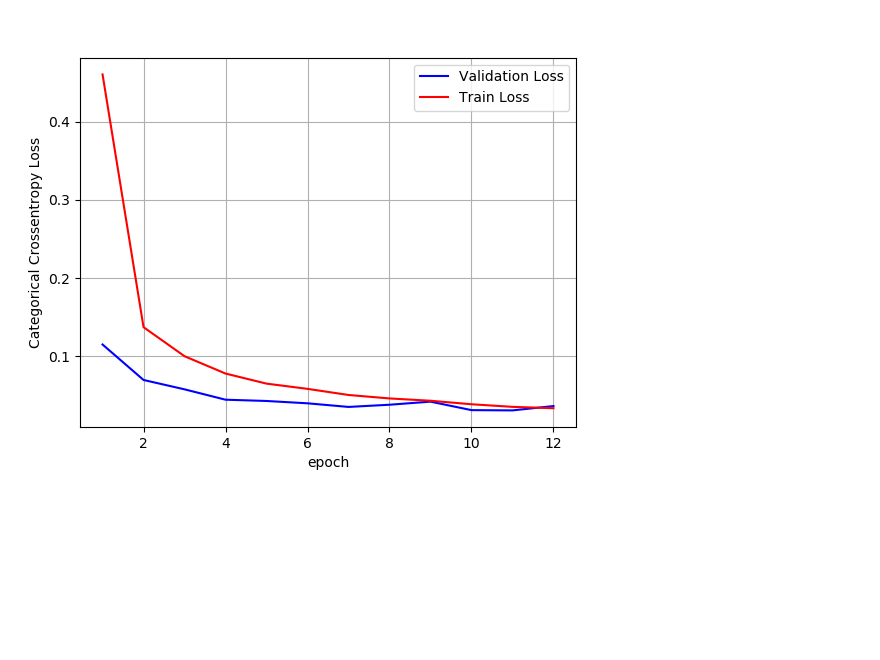

In [4]:
nb_epoch=12
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(plot_array.history.keys())
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = plot_array.history['val_loss']
ty = plot_array.history['loss']
plt_dynamic(x, vy, ty, ax)

### Architecture 2:  with batchNormalization and dropouts..

In [5]:
from  keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1 = Sequential()
model1.add(Conv2D(15, kernel_size=(7, 7),padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(12, (3, 3), padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Conv2D(18, (5, 5), padding='same',activation='relu'))
model1.add(Conv2D(25, (7, 7), padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Conv2D(32, (5, 5), padding='same',activation='relu'))
model1.add(Conv2D(12, (7, 7), padding='same',activation='relu'))
model1.add(Conv2D(12, (9, 9), padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 15)        750       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 12)        1632      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 12)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 12)        48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 12)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 18)        5418      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 25)        22075     
__________

In [6]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

plot_array=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 184us/step - loss: 1.2730 - acc: 0.5942 - val_loss: 0.1695 - val_acc: 0.9512
Epoch 2/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.3586 - acc: 0.8992 - val_loss: 0.1917 - val_acc: 0.9477
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.2181 - acc: 0.9432 - val_loss: 0.0763 - val_acc: 0.9793
Epoch 4/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.1705 - acc: 0.9569 - val_loss: 0.0648 - val_acc: 0.9826
Epoch 5/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.1413 - acc: 0.9661 - val_loss: 0.0484 - val_acc: 0.9882
Epoch 6/30
60000/60000 [==============================] - 9s 149us/step - loss: 0.1236 - acc: 0.9697 - val_loss: 0.0407 - val_acc: 0.9897
Epoch 7/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.1104 - acc: 0.9733 - val_loss: 0.0587 -

Test score: 0.03540907850921212
Test accuracy: 0.9916
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


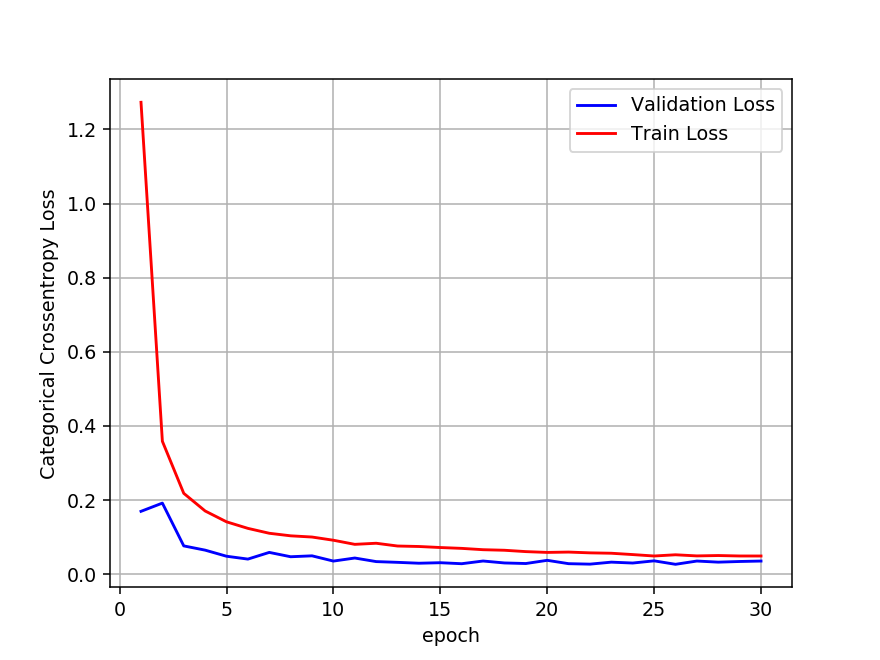

In [8]:
nb_epoch=30
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(plot_array.history.keys())
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = plot_array.history['val_loss']
ty = plot_array.history['loss']
plt_dynamic(x, vy, ty, ax)

## Model 2 is nothing but model1+ data augmentation

In [9]:
nb_epoch=30
from  keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2 = Sequential()
model2.add(Conv2D(15, kernel_size=(7, 7),padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(12, (3, 3), padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(18, (5, 5), padding='same',activation='relu'))
model2.add(Conv2D(25, (7, 7), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(32, (5, 5), padding='same',activation='relu'))
model2.add(Conv2D(12, (7, 7), padding='same',activation='relu'))
model2.add(Conv2D(12, (9, 9), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 22, 22, 15)        750       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 12)        1632      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 12)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 10, 10, 12)        48        
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 12)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 18)        5418      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 25)        22075     
__________

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_gen =ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_gen.fit(x_train)
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
plot_array=model2.fit_generator(train_gen.flow(x_train,y_train,
                    batch_size=batch_size),
                    nb_epoch=nb_epoch,
                    validation_data=(x_test,y_test))

C:\Users\vishnuvardhanreddy\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vishnuvardhanreddy\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., epochs=30)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30
469/469 [==============================] - 16s 33ms/step - loss: 2.4220 - acc: 0.1989 - val_loss: 1.5774 - val_acc: 0.4668
Epoch 2/30
469/469 [==============================] - 13s 28ms/step - loss: 1.7198 - acc: 0.3715 - val_loss: 1.2126 - val_acc: 0.5656
Epoch 3/30
469/469 [==============================] - 12s 26ms/step - loss: 1.3997 - acc: 0.5101 - val_loss: 0.7801 - val_acc: 0.7341
Epoch 4/30
469/469 [==============================] - 12s 26ms/step - loss: 1.1629 - acc: 0.6078 - val_loss: 0.5203 - val_acc: 0.8186
Epoch 5/30
469/469 [==============================] - 14s 30ms/step - loss: 1.0125 - acc: 0.6691 - val_loss: 0.3957 - val_acc: 0.8811
Epoch 6/30
469/469 [==============================] - 13s 27ms/step - loss: 0.8908 - acc: 0.7165 - val_loss: 0.3642 - val_acc: 0.8765
Epoch 7/30
469/469 [==============================] - 12s 26ms/step - loss: 0.8036 - acc: 0.7490 - val_loss: 0.2909 - val_acc: 0.9061
Epoch 8/30
469/469 [==============================] - 12s 25ms

Test score: 0.1078857864547521
Test accuracy: 0.9684
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


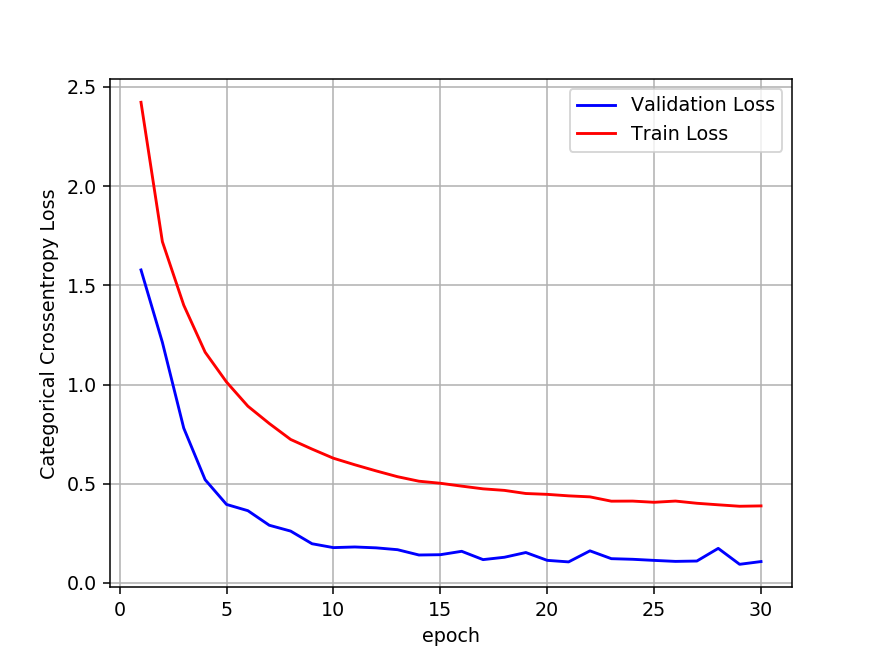

In [11]:
nb_epoch=30
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(plot_array.history.keys())
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = plot_array.history['val_loss']
ty = plot_array.history['loss']
plt_dynamic(x, vy, ty, ax)